In [22]:
#!pip install pystan
#!pip install prophet --no-binary :all:
!python -m pip install prophet


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [34]:
#path = "https://covid.ourworldindata.org/data/ecdc/total_cases.csv"
path = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
data = pd.read_csv(path)
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-12,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-19,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-26,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-02,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [35]:
data.drop(data.columns.difference(['date','total_cases']), 1, inplace=True)
data

<ipython-input-35-13e7869c7368>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(data.columns.difference(['date','total_cases']), 1, inplace=True)


,date,total_cases
0,2020-01-05,NaN
1,2020-01-12,NaN
2,2020-01-19,NaN
3,2020-01-26,NaN
4,2020-02-02,NaN
...,...,...
276376,2023-12-10,265975.0
276377,2023-12-17,266025.0
276378,2023-12-24,266048.0
276379,2023-12-31,266071.0


In [38]:
grouping = data.groupby('date')['total_cases'].sum().reset_index()
grouping

,date,total_cases
0,2020-01-01,0.0
1,2020-01-02,0.0
2,2020-01-03,0.0
3,2020-01-04,0.0
4,2020-01-05,9.0
...,...,...
1470,2024-01-10,0.0
1471,2024-01-11,0.0
1472,2024-01-12,0.0
1473,2024-01-13,0.0


In [39]:
from prophet import Prophet
model = Prophet(interval_width=0.96)

In [40]:
grouping.rename(columns={"date":"ds","total_cases":"y"},inplace=True)
grouping

,ds,y
0,2020-01-01,0.0
1,2020-01-02,0.0
2,2020-01-03,0.0
3,2020-01-04,0.0
4,2020-01-05,9.0
...,...,...
1470,2024-01-10,0.0
1471,2024-01-11,0.0
1472,2024-01-12,0.0
1473,2024-01-13,0.0


In [41]:
model.fit(grouping)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpumck7vm5/hvudw2f_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpumck7vm5/6jq17sbj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82178', 'data', 'file=/tmp/tmpumck7vm5/hvudw2f_.json', 'init=/tmp/tmpumck7vm5/6jq17sbj.json', 'output', 'file=/tmp/tmpumck7vm5/prophet_model3drq9qd3/prophet_model-20240115161639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:16:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:16:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [42]:
future_dates = model.make_future_dataframe(periods = 100)
ypred = model.predict(future_dates)
ypred[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
1565,2024-04-14,1.954955e+09,1.026089e+09,2.839504e+09
1566,2024-04-15,3.589536e+08,-5.766974e+08,1.254634e+09
1567,2024-04-16,3.578717e+08,-5.462380e+08,1.223391e+09
1568,2024-04-17,3.593534e+08,-5.685215e+08,1.256523e+09
1569,2024-04-18,3.592772e+08,-5.155781e+08,1.292714e+09
1570,2024-04-19,3.591143e+08,-5.937409e+08,1.300182e+09
1571,2024-04-20,3.588618e+08,-5.934664e+08,1.332727e+09
1572,2024-04-21,1.957179e+09,9.831366e+08,2.874214e+09
1573,2024-04-22,3.606112e+08,-5.809798e+08,1.250520e+09
1574,2024-04-23,3.589704e+08,-4.965761e+08,1.244628e+09


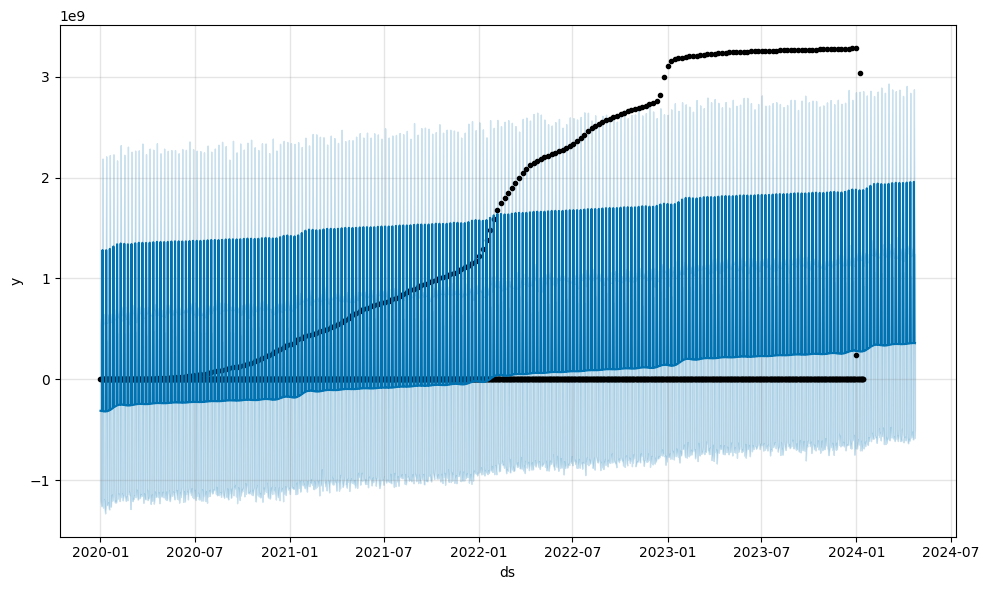

In [43]:
plotting = model.plot(ypred)

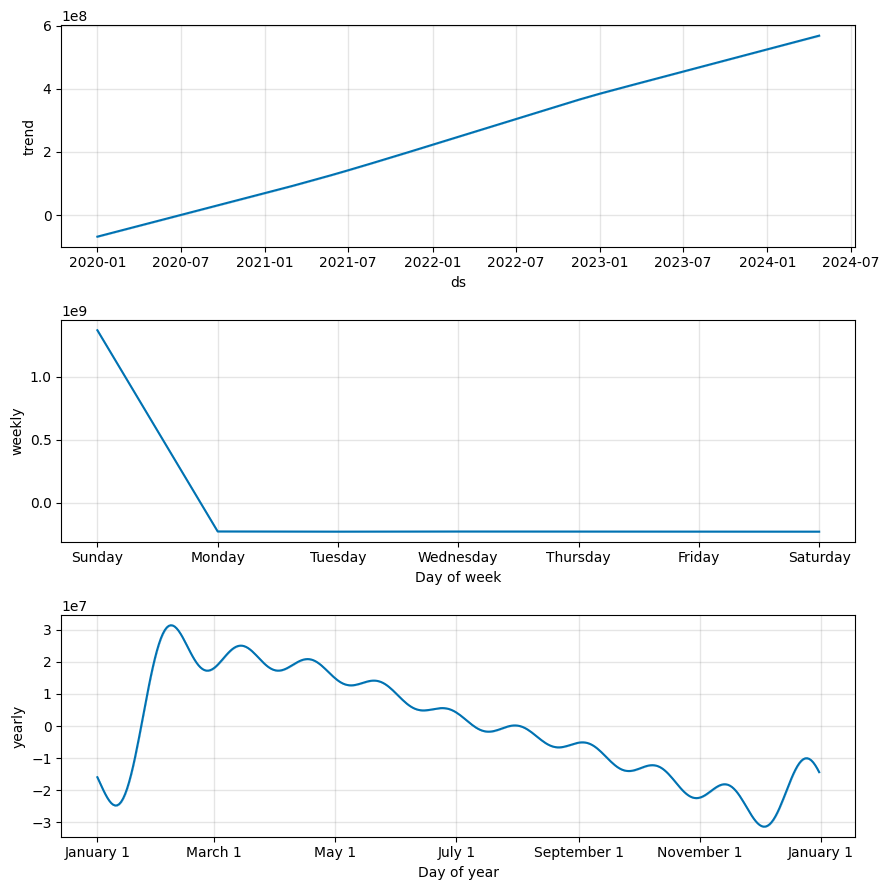

In [44]:
confirmed_plot_weekly = model.plot_components(ypred)